<a href="https://colab.research.google.com/github/Meet200/-Algorithms-in-python/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#find the relation between size of house and price

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [123]:
from google.colab import drive

In [124]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [126]:
#column name = ['x','y']
dataset = pd.read_csv("train.csv")
print(dataset)
dataset.shape

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


(700, 2)

In [127]:
dataf = pd.DataFrame(dataset)
dataf.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [128]:
x_value = dataf.iloc[0:700,0:1]

In [129]:
y_value = dataf.iloc[0:700,1:2]

In [130]:
x_value

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [131]:
y_value

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


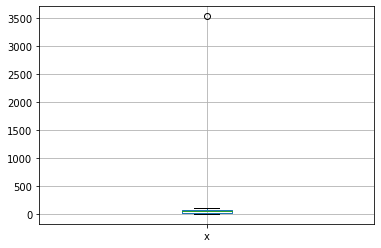

In [132]:
x_box=x_value.boxplot(column=['x'])

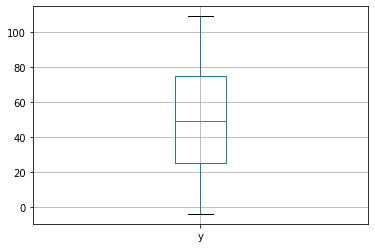

In [133]:
#@title Default title text
y_box=y_value.boxplot(column=['y'])

Text(0.5, 1.0, '1st LR Scatter plot ')

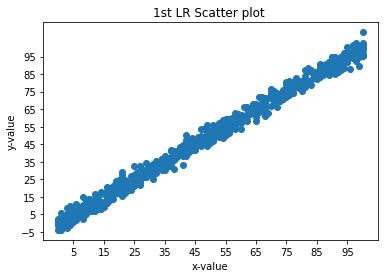

In [134]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(5,100,step=10))
plt.yticks(np.arange(-5,100,step=10))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("1st LR Scatter plot ")

In [135]:
#define hypothesis  H(x) = theta_array[0]+theta_array[1]*x
def hypothesis(theta_array,x):  #theta_array =[theta_array[0],theta_araay[1]]
  return theta_array[0] + theta_array[1]*x



In [171]:
#cost function 
def cost_function(theta_array,x,y,m):   # x,y are list of observation 
  total_error = 0
  for i in range(m):
    total_error +=(theta_array[0] + theta_array[1]*x[i]-y[i])**2
  
  return total_error/(2*m)

In [169]:
def gradient_descent(theta_array,x,y,alpha,m):

  # initializing summations to zero
  summation_0 = 0
  summation_1 = 0

  for i in range(m):        # finding the value of summations and finally the value of
      summation_0 += (theta_array[0] + theta_array[1]*x[i]) - y[i]

      summation_1 += x[i]*((theta_array[0] + theta_array[1]*x[i])-y[i])

  new_theta_0 = theta_array[0] - alpha * (summation_0) / m

  new_theta_1 = theta_array[1] - alpha * (summation_1) / m

  updated_theta_array = [new_theta_0, new_theta_1]
  print(updated_theta_array)
  return updated_theta_array




In [177]:
def training(x,y,alpha,iters):
  # This is the function which takes care of the Regression

  # Finding size of the training data
  m = x.size

  # initializing values of thetas
  theta_0 = 0     # bias
  theta_1 = 0     # weight

  # creating a weight matrix which contains both theta_0 and theta_1
  theta_array = [theta_0, theta_1]

  # creating an array that stores the values of the cost function during each iteration
  cost_function_values = []

  for i in range(iters):
      # changing the values of theta 0 and theta 1 according to the gradient descent method
      theta_array = gradient_descent(theta_array, x, y, alpha, m)

      # storing values of the cost function after every improvisation step (gradient descent step)
      cost_function_values.append(cost_function(theta_array, x, y, m))

      # print values every 10 iterations
      if i % 10 == 0:
          print('value of theta_0 at iteration %d is: ' % i, theta_array[0])
          print('value of theta_1 at iteration %d is: ' % i, theta_array[1], '\n')
          ynew=x*theta_array[1]+theta_array[0]
          plt.plot(x_train,ynew,'r')
          plt.scatter(x,y)
          plt.show()

  # Plot our cost function's progress over our training period to check if the model has learnt
  x = np.arange(0, len(cost_function_values), step=1)
  plt.plot(x, cost_function_values, "-b", label="Cost Function Curve")
  plt.title("Learning Curve")
  plt.xlabel("Number Of Iterations")
  plt.ylabel("Cost Function Value")
  plt.legend()
  plt.show()

In [179]:
training_data=pd.read_csv("train.csv")
cleaning_data = training_data.dropna()   # drops the observation for not a number
cleaning_data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [180]:
x_train=cleaning_data['x']

In [181]:
y_train=cleaning_data['y']

In [182]:
x_train.shape    # if want to reshape write x_value=x_train.values.reshape(x_train.size)  for both x and y 

(699,)

In [183]:
y_train.shape

(699,)

In [185]:
alpha=0.0001
iter=50
#training(x_value,y_value,alpha,iter)
training(x_value,y_value,alpha,iter)

KeyError: ignored